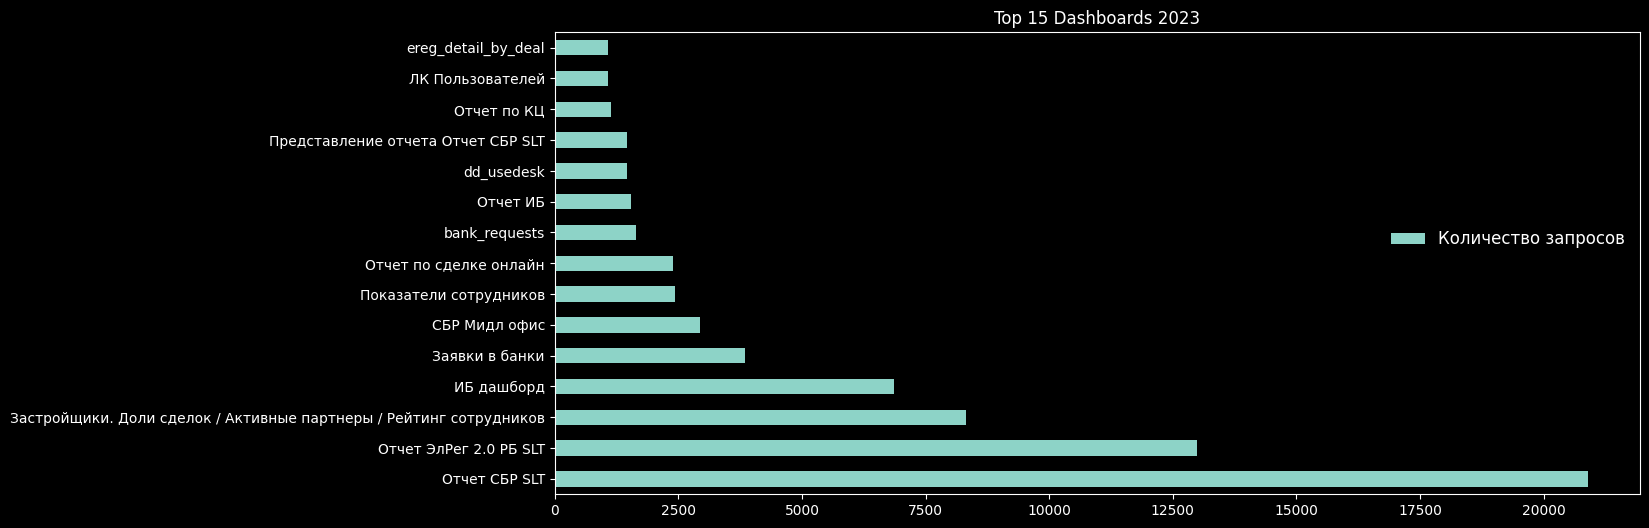

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
plt.style.use('dark_background')
df = pd.read_excel('История выполнения отчета (суммарный отчет) (12).xlsx')
dt = '2023-01-01'
t = df.query('`Временная метка` >= @dt').groupby(['REPORT NAME'],as_index = False).agg({'Выполнено':'sum'}).sort_values(by='Выполнено', ascending = False).head(15)
ax = t.plot(kind = 'barh', figsize=(14,6))
labels = t['REPORT NAME'].tolist()
ax.set_yticklabels(labels) # .remove
#legend_labels = ['Количество']
legend_colors = ['blue']
ax.legend(['Количество запросов'], loc='lower right', facecolor='black', title_fontsize='12', prop={'size': '12'}, framealpha=1, frameon=True, edgecolor='black', bbox_to_anchor=(1, 0.5))#title='Легенда'
ax.set_title("Top 15 Dashboards 2023")
plt.show()

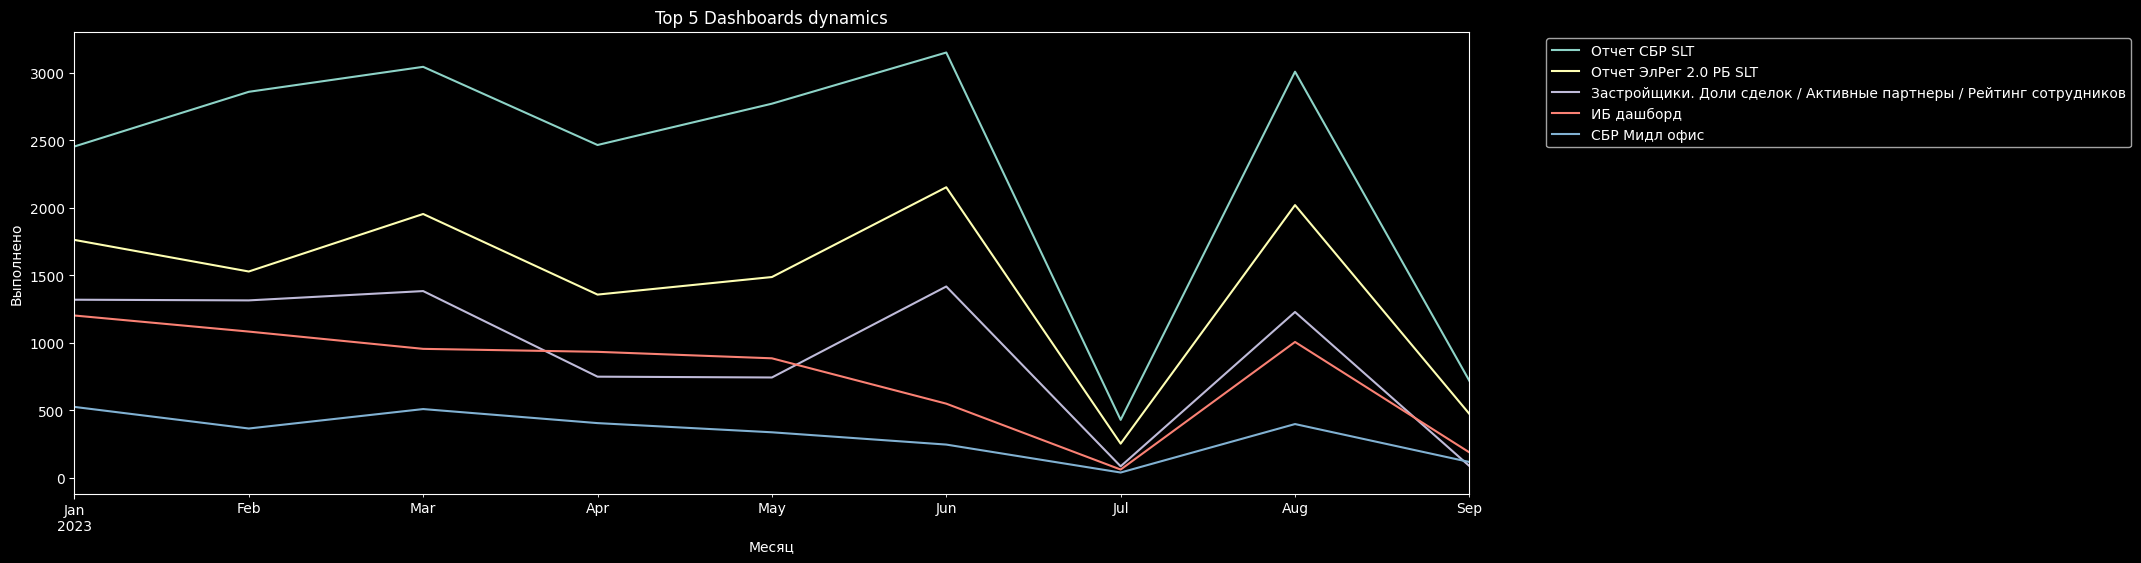

In [65]:
dt = '2023-01-01'
rep = ['Отчет СБР SLT','Отчет ЭлРег 2.0 РБ SLT', 'Застройщики. Доли сделок / Активные партнеры / Рейтинг сотрудников', 'ИБ дашборд', 'СБР Мидл офис']
t = df.query('`Временная метка` >= @dt & `REPORT NAME` == @rep ').groupby(['REPORT NAME','Временная метка'],as_index = False).agg({'Выполнено':'sum'}).sort_values(by='Выполнено', ascending = False).sort_values(by = 'Временная метка', ascending = True)
t['Временная метка'] = pd.to_datetime(t['Временная метка'])
t['Месяц'] = t['Временная метка'].dt.to_period('M')
t_grouped = t.groupby(['REPORT NAME', 'Месяц'], as_index=False).agg({'Выполнено': 'sum'}).sort_values(by=['Месяц', 'Выполнено'], ascending=[True, False])
t_pivoted = t_grouped.pivot(index='Месяц', columns='REPORT NAME', values='Выполнено').reset_index()
t_pivoted = t_pivoted.sort_values(by='Месяц', ascending=True)
desired_column_order = ['Месяц', 'Отчет СБР SLT', 'Отчет ЭлРег 2.0 РБ SLT', 'Застройщики. Доли сделок / Активные партнеры / Рейтинг сотрудников', 'ИБ дашборд', 'СБР Мидл офис']
t_pivoted = t_pivoted[desired_column_order]

t_pivoted.set_index('Месяц', inplace=True)

ax = t_pivoted.plot(kind='line', figsize=(18, 6))
ax.legend( loc='upper left', bbox_to_anchor=(1.05, 1))
ax.set_title("Top 5 Dashboards dynamics")
ax.set_xlabel("Месяц")  
ax.set_ylabel("Выполнено")

plt.show()

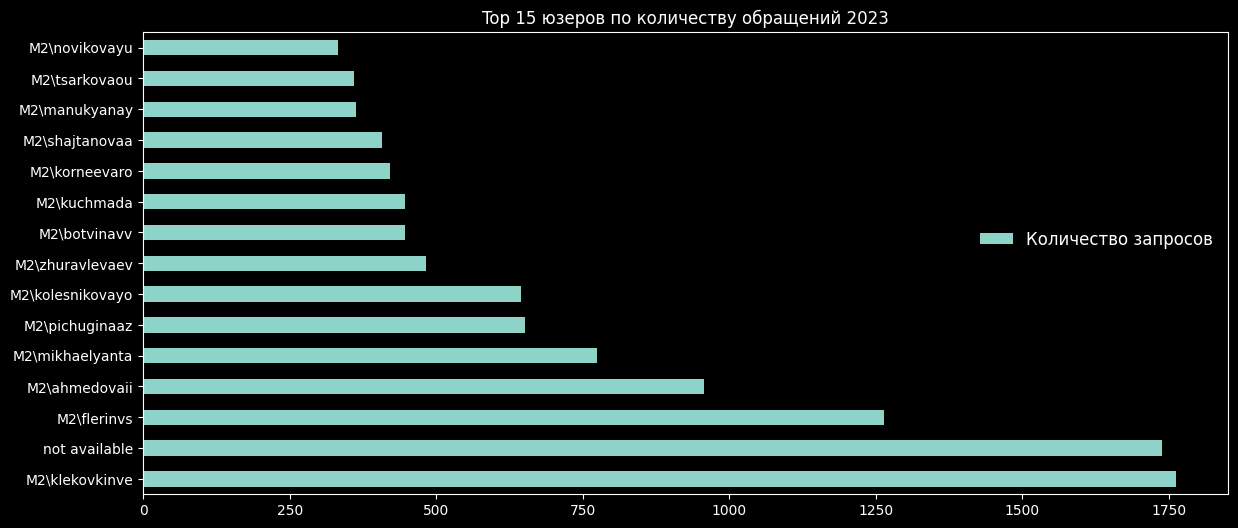

In [4]:
df = pd.read_excel('История выполнения отчета (суммарный отчет) (12).xlsx')
dt = '2023-08-01'
t = df.query('`Временная метка` >= @dt').groupby(['Имя пользователя'],as_index = False).agg({'Выполнено':'sum'}).sort_values(by='Выполнено', ascending = False).head(15)
ax = t.plot(kind = 'barh', figsize=(14,6))
labels = t['Имя пользователя'].tolist()
ax.set_yticklabels(labels) # .remove
#legend_labels = ['Количество']
legend_colors = ['blue']
ax.legend(['Количество запросов'], loc='lower right', facecolor='black', title_fontsize='12', prop={'size': '12'}, framealpha=1, frameon=True, edgecolor='black', bbox_to_anchor=(1, 0.5))#title='Легенда'
ax.set_title("Top 15 юзеров по количеству обращений 2023")
plt.show()